In [34]:
# exercise with a new dataset : load_wine()
from sklearn.datasets import load_wine
dataset=load_wine()
df=pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["class"]=dataset.target
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  class  
0           

In [35]:
# sanity check
df.head() #print first 5 rows with column names

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [36]:
# get amount of rows and columns
print(df.shape)

(178, 14)


In [37]:
# get columns in the dataframe
print(df.columns)

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')


In [38]:
# get statistical summary
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [39]:
# check missing values
df.isnull().values.sum()

0

In [40]:
# feature filtering
from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold()

#prefit object with df[cols]
selector.fit(df[df.columns])

# check feature variances before selection
print(selector.variances_)

[6.55359730e-01 1.24100408e+00 7.48418003e-02 1.10900306e+01
 9.20000000e+01 3.89489032e-01 9.92113512e-01 1.54016191e-02
 3.25754248e-01 5.34425585e+00 5.19514497e-02 5.01254463e-01
 1.40200000e+03 5.97304633e-01]


In [41]:
# set threshold into selector object
selector.set_params(threshold=0.6)

# refit and transform, store output in out_sell
out_sel=selector.fit_transform(df[df.columns])
print(selector.get_support())

[ True  True False  True  True False  True False False  True False False
  True False]


In [42]:
# filter in the selected features
df_feat=df[df.columns]
df_sel=df_feat.iloc[:,selector.get_support()]

# add labels to new dataframe and sanity check
df_sel=pd.concat([df_sel,df[["class"]]],axis=1)
print(df_sel.head())

   alcohol  malic_acid  alcalinity_of_ash  magnesium  flavanoids  \
0    14.23        1.71               15.6      127.0        3.06   
1    13.20        1.78               11.2      100.0        2.76   
2    13.16        2.36               18.6      101.0        3.24   
3    14.37        1.95               16.8      113.0        3.49   
4    13.24        2.59               21.0      118.0        2.69   

   color_intensity  proline  class  
0             5.64   1065.0      0  
1             4.38   1050.0      0  
2             5.68   1185.0      0  
3             7.80   1480.0      0  
4             4.32    735.0      0  


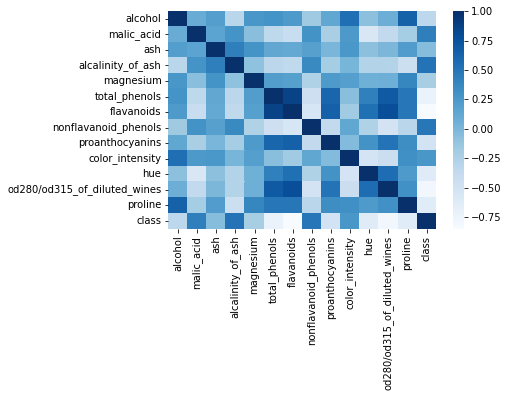

In [43]:
# find correlation with pandas ".corr()"
cor=df.corr()

#visualize with Seaborn heat map, color map= Blues
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cor,annot=False,cmap=plt.cm.Blues)
plt.show()

In [44]:
# check the r coefficient of the output variable
cor_target=abs(cor["class"])
print(cor_target)

alcohol                         0.328222
malic_acid                      0.437776
ash                             0.049643
alcalinity_of_ash               0.517859
magnesium                       0.209179
total_phenols                   0.719163
flavanoids                      0.847498
nonflavanoid_phenols            0.489109
proanthocyanins                 0.499130
color_intensity                 0.265668
hue                             0.617369
od280/od315_of_diluted_wines    0.788230
proline                         0.633717
class                           1.000000
Name: class, dtype: float64


In [45]:
# choose features above threshold 0.6
selected_cols=cor_target[cor_target > 0.6]
print("selected column, correlation with target > 0.6")
print(selected_cols)

# filter in the selected features
df_sel=df[selected_cols.index]
print(df_sel.head())

selected column, correlation with target > 0.6
total_phenols                   0.719163
flavanoids                      0.847498
hue                             0.617369
od280/od315_of_diluted_wines    0.788230
proline                         0.633717
class                           1.000000
Name: class, dtype: float64
   total_phenols  flavanoids   hue  od280/od315_of_diluted_wines  proline  \
0           2.80        3.06  1.04                          3.92   1065.0   
1           2.65        2.76  1.05                          3.40   1050.0   
2           2.80        3.24  1.03                          3.17   1185.0   
3           3.85        3.49  0.86                          3.45   1480.0   
4           2.80        2.69  1.04                          2.93    735.0   

   class  
0      0  
1      0  
2      0  
3      0  
4      0  


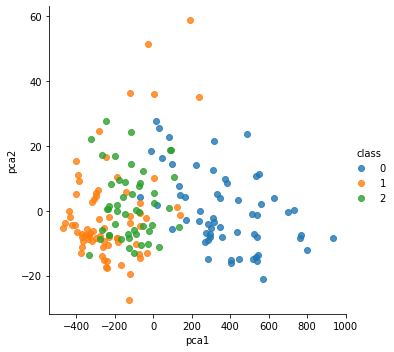

In [46]:
# pca
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

# fit and transform using all features input dimensions
out_pca=pca.fit_transform(df[df.columns])

# create pca output dataframe and add label column "class"
df_pca=pd.DataFrame(data=out_pca, columns=["pca1","pca2"])
df_pca=pd.concat([df_pca, df[["class"]]], axis=1)

# plot scatter of pca data
sns.lmplot(x="pca1",y="pca2",hue="class", data=df_pca, fit_reg=False)

In [47]:
# get variance explained by each component
print(pca.explained_variance_ratio_)

[0.99808763 0.00173592]


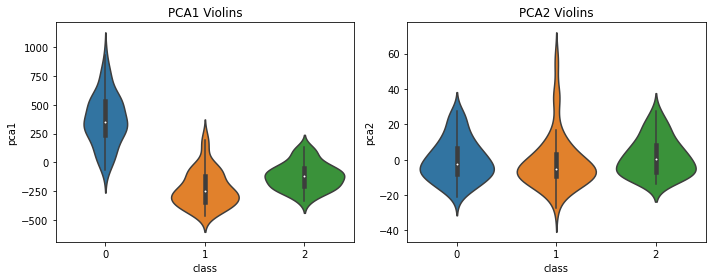

In [48]:
# visualize this outcome with violins for each component
fig, (ax1, ax2)=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,4)

sns.violinplot(x="class", y="pca1", data=df_pca, ax=ax1)
ax1.set(title="PCA1 Violins")
sns.violinplot(x="class", y="pca2", data=df_pca, ax=ax2)
ax2.set(title="PCA2 Violins")

plt.tight_layout()

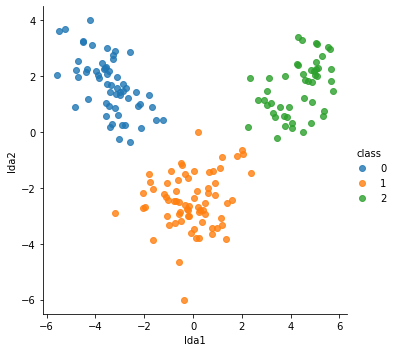

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(df[df.columns],df["class"])
out_lda=lda.transform(df[df.columns])

df_lda=pd.DataFrame(data=out_lda,columns=["lda1","lda2"])
df_lda=pd.concat([df_lda, df[["class"]]], axis=1)
# plot scatter of pca data
sns.lmplot(x="lda1",y="lda2",hue="class", data=df_lda, fit_reg=False)

In [50]:
# cluster with k-means and check silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# initialize k-means algorithm object
kmns=KMeans(n_clusters=3, random_state=42)

# fit algorithm to pca and find silhouette score
out_kms_pca=kmns.fit_predict(out_pca)
silhouette=silhouette_score(out_pca,out_kms_pca)
print("PCA silhouette score = "+str(silhouette))

# fit algorithm to lda and find silhouette score
out_kms_lda=kmns.fit_predict(out_lda)
silhouette=silhouette_score(out_lda, out_kms_lda)
print("LDA silhouette score = %2f" %silhouette)

PCA silhouette score = 0.5722558407969057
LDA silhouette score = 0.663170
